In [1]:
import pandas as pd
import numpy as np
import tikzplotlib
df = pd.read_csv("../data/01_raw/2022/tickets.csv")
df

,ID,Beschreibung,Kategorie ID,Kategorietext,Unterkategorie ID,Unterkategorietext,Ticket Label,Abteilung Label,Produkt Label,Priorität,...,Angelegt Am,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Erste Nachricht,Letzte Nachricht
0,2000013021,Bestellung/Bereitstellung TS410-Mandant,ZSD_SR_TERP,TERP10/TS410,ZSD_SR_TERP_ANF,TERP10/TS410 Anfrage,2. Level,Applikation,TS410,3: mittel,...,2022.01.03\t13:51:04,H2671TG1,2022.01.12\t16:18:59,H2851BB2,H2671 Hochschule Worms,H2671TG1 Herr Tobias Güthinger,0000000047 APP Applikation,H2851BB2 Herr Benedikt Betzwieser,2022.01.03\t13:51:04,2022.01.12\t16:18:51
1,2000013022,Online-Zugang SAP4school,ZSD_SR_GBI,SAP ERP GBI,ZSD_SR_GBI_SE,System Erreichbarkeit,1. Level,Applikation,GBI,3: mittel,...,2022.01.03\t15:19:55,H2851US4,2022.02.03\t18:00:22,BORYS,H2934MH1 Marion Hintereder,H2851US4 Herr UCC Support,0000000047 APP Applikation,H2851US4 Herr UCC Support,2022.01.03\t15:19:55,2022.02.03\t18:00:20
2,2000013023,Password for user MariuszS,ZSD_SR_HANA,SAP HANA,ZSD_SR_HANA_PRM,Passwortrücksetzung für Masteruser,1. Level,,,3: mittel,...,2022.01.04\t11:51:38,U2PL019MS1,2022.01.24\t18:00:18,BORYS,U2PL019 WSB University in Poznan Wyższa Szkoła...,U2PL019MS1 Herr Mariusz Szczubelek,0000000047 APP Applikation,H2851US4 Herr UCC Support,2022.01.04\t11:51:38,2022.01.24\t18:00:18
3,2000013024,remote login accounts not working,ZSD_SR_AA,Allgemeine Anfragen,ZSD_SR_AA_RL,Remote Login,1. Level,Applikation,UCC Portal,3: mittel,...,2022.01.04\t14:37:58,U2TR011PA3,2022.01.25\t18:00:16,BORYS,U2TR011 Ozyegin University,U2TR011PA3 Frau Pelin Atahan,0000000047 APP Applikation,H2851US4 Herr UCC Support,2022.01.04\t14:37:58,2022.01.25\t18:00:16
4,2000013025,Anzeigeproblem,ZSD_SR_S4HANA,SAP S/4HANA und DT Curriculum,ZSD_SR_S4HANA_SON,Sonstiges,2. Level,Applikation,GBI,3: mittel,...,2022.01.04\t16:02:18,H2661CL1,2022.01.10\t14:37:24,H2851CD1,H2661 ASW gGmbH,H2661CL1 Herr Christoph Lauterbach,0000000047 APP Applikation,H2851CD1 Herr Clemens Drieschner,2022.01.04\t16:02:16,2022.01.10\t11:28:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,8000003510,Issue creation test,,,,,,,,1: sehr hoch,...,2022.12.27\t17:29:14,SOLMAN_BTC,2022.12.27\t17:29:15,SOLMAN_BTC,,,,NaN,2022.12.27\t17:29:15,2022.12.27\t17:29:15
1311,8000003511,Issue creation test,,,,,,,,1: sehr hoch,...,2022.12.28\t17:29:11,SOLMAN_BTC,2022.12.28\t17:29:12,SOLMAN_BTC,,,,NaN,2022.12.28\t17:29:12,2022.12.28\t17:29:12
1312,8000003512,Issue creation test,,,,,,,,1: sehr hoch,...,2022.12.29\t17:29:22,SOLMAN_BTC,2022.12.29\t17:29:23,SOLMAN_BTC,,,,NaN,2022.12.29\t17:29:23,2022.12.29\t17:29:23
1313,8000003513,Issue creation test,,,,,,,,1: sehr hoch,...,2022.12.30\t17:29:07,SOLMAN_BTC,2022.12.30\t17:29:08,SOLMAN_BTC,,,,NaN,2022.12.30\t17:29:08,2022.12.30\t17:29:08


In [2]:
# remove blank space values
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True, subset=["Ticket Label", "Abteilung Label", "Produkt Label"])

In [3]:
# merge into timestamp
df["timestamp"] = pd.to_datetime(
    df["Datum"] + " " + df["Uhrzeit"]
)
# filter only tickets with a description
contents = df[df["Nachrichtentyp"].str.contains("Beschreibung")]
# filter for initial messages only
initial_timestamps = contents.groupby("ID")["timestamp"].min()
initial_messages = pd.DataFrame({"timestamp": initial_timestamps}).reset_index()
initial_messages = initial_messages.merge(
    contents, on=["ID", "timestamp"], how="left"
)
df = initial_messages
df

KeyError: 'Datum'

In [4]:
df["Ticket Label"].value_counts()

2. Level     534
1. Level     176
Name: Ticket Label, dtype: int64

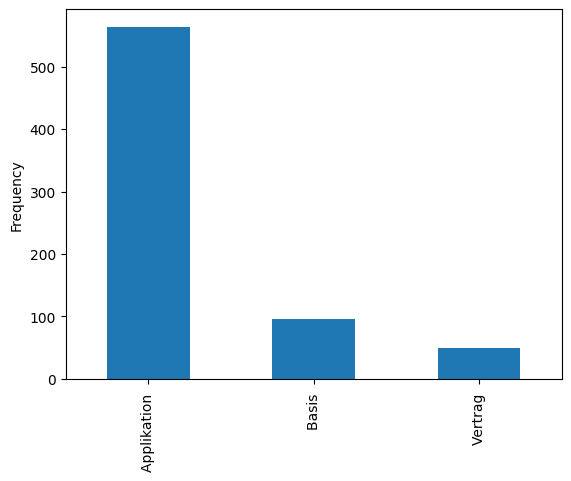

In [7]:
df["Abteilung Label"].value_counts().plot.bar(ylabel="Frequency")
tikzplotlib.save("plots/label_abteilung_hist.tex")

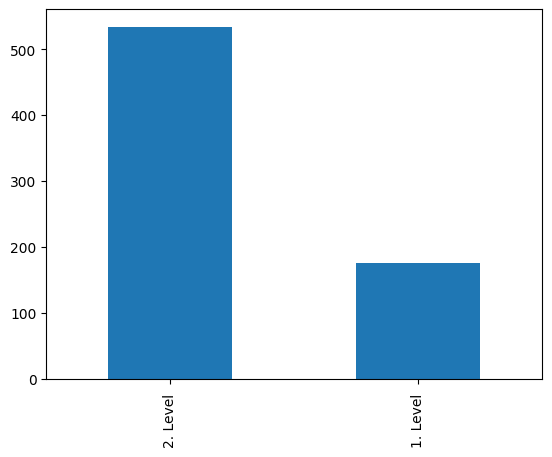

In [6]:
df["Ticket Label"].value_counts().plot.bar()
tikzplotlib.save("plots/label_ticket_hist.tex")

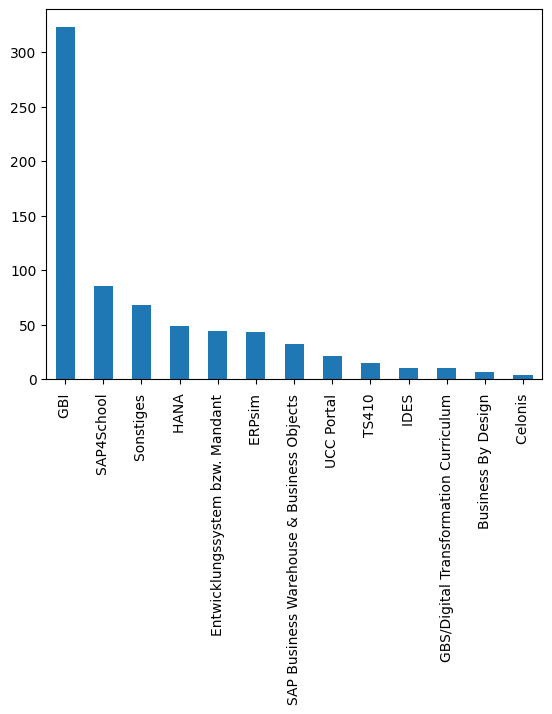

In [7]:
df["Produkt Label"].value_counts().plot.bar()
tikzplotlib.save("plots/label_produkt_hist.tex")